# 1. Preliminaries and data
This is the first in a 6-part series of notebooks introducing core concepts in machine learning using the scikit-learn package in Python. In this notebook, we review a bit of background material, including short discussions of prerequisites, organization of the material, and major software dependencies. We then take a look at the dataset we'll use as a running working example throughout the rest of the notebooks. Readers comfortable with the Python language itself, as well as Jupyter notebooks and very basic pandas usage, can safely skip ahead to the "ABIDE II Dataset" section below, and readers who are additionally more interested in the mechanics of scikit-learn than in the specific domain application (neuroimaging) should feel free to skip this entire notebook and go straight to part 2.

## Preliminaries
### Prerequisites and target audience
Prerequisites for this tutorial are minimal; chiefly, it's assumed that the reader has a bit of prior programming experience—preferably in Python—and a passing familiarity with basic inferential statistical methods (e.g., linear regression). Neither of these is strictly necessary, but you'll probably get more out of the tutorial if you have them.

The target audience for this tutorial consists of biomedical or social scientists who have some background in quantitative research methods (e.g., basic statistics) and are interested in learning a bit of machine learning. The examples and much of the discussion are specifically aimed at neuroimaging researchers, but the vast majority of the material should also be comprehensible and beneficial to researchers who work in very different fields. You'll probably also notice that this tutorial is more verbose than most other scikit-learn tutorials. This is by design: the emphasis is on developing a conceptual understanding of what we're doing—with an emphasis on ideas salient to neuroimaging researchers—rather than just on learning the scikit-learn API. But of course, you're welcome to attend selectively to the code samples.

### Notebook organization
This tutorial is organized into several [Jupyter notebooks](http://jupyter.org). A Jupyter notebook is a web application that lets you combine text (or HTML), code, figures, equations, interactive widgets, and more, all in one magical document. There are currently 6 notebooks in total; each one provides an introductory look at a different topic in machine learning. The coverage is by no means exhaustive; the goal is simply to provide a high-level overview of a number of key machine learning concepts and practices.

An important benefit of the Jupyter notebook format is that it's easy to interact with the code. To facilitate this, I've tried to put key parameters that you're encouraged to modify in constants (you'll recognize them by the fact that the variable names are all `UPPERCASE`) at the top of each cell. When you see something like `N = 30`, feel free to change it to `N = 300` and re-run the cell to see what effect it has on the generated plots or results. (Of course, you should feel free to modify the rest of the code as well!)

While most of the code is included in the tutorial notebooks themselves, in a few cases where the code is particularly long, I've abstracted it into helper functions in the `support/` folder. This is done to reduce clutter and increase clarity, but it goes without saying that you can always go and take a look at the supporting code if you want to see the details.

### Software
All of the code in this tutorial is written in Python. There's nothing intrinsically special about Python in the machine learning context; in principle, the content in these notebooks could have been written in other languages (R, Matlab, etc.). Indeed, there are plenty of machine learning tutorials out there written in other languages.

That said, Python does have a number of practical advantages. Chief among these is that it's currently the most widely used language in the data science and machine learning communities. This means there are exceptional tools written in Python for virtually every domain of machine learning. Exhibit A is the [scikit-learn](https://scikit-learn.org/stable/) package for machine learning, which we'll rely on heavily throughout this tutorial. Scikit-learn is the world's most widely used machine learning, and some of the reasons for its popularity will hopefully soon become clear. Scikit-learn is itself built on the [numpy](https://www.numpy.org) numerical computing library, which we'll also use fairly regular.

If you're running these notebooks locally, you can install the dependencies (numpy, pandas, sklearn, matplotlib, seaborn) with pip or conda. E.g.:

> pip install numpy pandas sklearn matplotlib seaborn

## The ABIDE II dataset
The dataset we'll work with throughout these notebooks come from the [Autism Brain Imaging Data Exchange](http://fcon_1000.projects.nitrc.org/indi/abide/) (ABIDE) project. ABIDE is a long-running effort to advance understanding of autism by aggregating and sharing autism-related structural and functional imaging datasets from around the world. There are actually two separate ABIDE projects—each with over 1,000 scans acquired at numerous sites. In this tutorial, we'll be using data strictly from ABIDE II, though one could easily adapt the notebooks to work on ABIDE I. 

### The data
The data we'll use are contained in a single tab-separate file included in the `data/` directory alongside the notebooks. Let's read it in and take a quick look at its contents:

In [1]:
# Here we're importing the pandas package, which we'll use extensively
# for data manipulation. In future sections, we'll put the core imports
# at the top of the notebook, which is the convention in Python.
import pandas as pd

# read_csv can read in just about any plain-text tabular data
data = pd.read_csv('data/abide2.tsv', sep='\t')

print("Dataset shape:", data.shape)
data.head()

Dataset shape: (1004, 1446)


,site,subject,age,age_resid,sex,group,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,ABIDEII-KKI_1,29293,8.893151,13.642852,2.0,1.0,2750.0,306.0,354.0,2123.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,ABIDEII-OHSU_1,28997,12.000000,16.081732,2.0,1.0,2836.0,186.0,354.0,2261.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,ABIDEII-GU_1,28845,8.390000,12.866264,1.0,2.0,3394.0,223.0,373.0,2827.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,ABIDEII-NYU_1,29210,8.300000,13.698139,1.0,1.0,3382.0,266.0,422.0,2686.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,ABIDEII-EMC_1,29894,7.772758,14.772459,2.0,2.0,3080.0,161.0,346.0,2105.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128


The dataframe has 1004 rows and 1446 columns; above are the first five rows. Every row represents a different person, and every column represents a different variable. In machine learning terminology, we typically refer to the rows and columns as **samples** and **features**, respectively. We can thus think of our data as a two-dimensional $n$ (samples) x $p$ (features) matrix. The vast majority of algorithms implemented in the scikit-learn package expect to receive numerical matrices of this kind as their primary inputs.

#### Demographic/phenotypic data
The columns in the dataframe come from two sources. The first 6 columns contain basic demographic/phenotypic information taken directly from the Composite Phenotypic File on the [ABIDE II project website](http://fcon_1000.projects.nitrc.org/indi/abide/abide_II.html). To keep things simple, I've only kept a handful of columns that we'll discuss in these notebooks. The most important ones are **age**, which will serve as the target of most of our predictive modeling efforts, and **group**, which displays the diagnosis group (1 = autism, 2 = control). I've also done some other gentle preprocessing—e.g., only keeping each subject's first scan; renaming the variables to something more user-friendly; etc.

#### Brain data
The other 1,440 columns contain structural brain features extracted from the ABIDE II subjects' MRI scans using the [FreeSurfer](https://surfer.nmr.mgh.harvard.edu/) software package. While raw imaging data in several modalities can be downloaded directly from the ABIDE website, processing 1,000+ scans shouldn't be anyone's idea of a good time, so I've taken the liberty of including already-extracted features. These come courtesy of Richard Bethlehem, who was kind enough to point me to his [GitHub repository](https://github.com/rb643/Normative_modeling) containing the features. The data are used in an under-review paper; at present the citation is:

> Richard A.I. Bethlehem, Jakob Seidlitz, Rafael Romero-Garcia, Guillaume Dumas, & Michael V. Lombardo. (2018, August 1). Normative age modelling of cortical thickness in autistic males (Version V2.1). Zenodo. http://doi.org/10.5281/zenodo.1325171

The 1,440 features represent 4 sets of 360 features. The 4 variables extracted by FreeSurfer are surface area, volume, cortical thickness, and [local gyrification index](https://surfer.nmr.mgh.harvard.edu/fswiki/LGI). For each feature, there are 360 variables, representing the 360 parcels in the [Human Connectome Project Multi-Modal Parcellation atlas](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4990127/) (HCP-MMP1). The parcellation looks approximately like this:

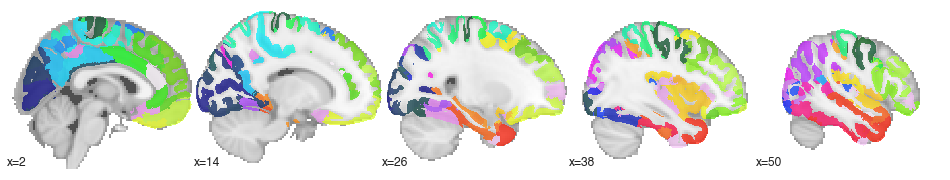

In [2]:
# A helper function for plotting the HCP-MMP1 parcels
from support import plot_hcp_mmp1

plot_hcp_mmp1(display_mode='x', cut_coords=[2, 14, 26, 38, 50])

I say "approximately", because the above is actually a projection of the HCP-MMP1 atlas into a volumetric space. This is done purely for convenience (it allows us to use some very handy plotting tools found in the [Nilearn](https://nilearn.github.io/index.html) package). We won't be doing any real spatial analyses in these tutorials, so the above is purely to visual orient you to what's going on here, and reassure you that the data we're working with are in fact derived from human neuroimaging data, even if they don't look that way in their current tabular form.

It's also worth emphasizing that our goal in this tutorial is to explore ML concepts and learn to use scikit-learn, not to better understand the brain. In a real scientific application, we'd probably want to do much more extensive visualization and descriptive exploration of our dataset before we ever fit any kind of statistical model. But since we're on a tight schedule here, we'll do that stuff in-line as it becomes relevant to the concepts under discussion. For the same reason, we're not going to worry about quality control, or discuss how the variables were extracted, what they mean, and so on. There's plenty of information out there on the ABIDE II dataset (see e.g., the [list of papers](http://fcon_1000.projects.nitrc.org/indi/abide/manuscripts.html) that have used abide data) and [FreeSurfer](https://surfer.nmr.mgh.harvard.edu/fswiki/FreeSurferWiki#Publications), so you can explore those at your leisure.

## On we go...
Now that we have the preliminaries out of the way, and have some data to play with, we can start doing machine learning! In part 2 of this tutorial, we'll review some core machine learning concepts, and introduce the scikit-learn package.